In [1]:
!pip install imblearn
!pip install Seaborn
!pip install yellowbrick

In [2]:
from google.colab import drive
drive.mount('/content/drive')

#Load Dataset
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/Thesis/Sentiment Analysis/Data/English Dataset.xlsx')
data = data.loc[:, ~data.columns.str.contains("^Unnamed")] #Remove unnammed column
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,English Reviews,Class
0,though price is much higher than the product q...,1
1,"To be honest.I am well satisfied,Thanks Daraz ...",1
2,Very Good..i bought 2 pairs...using them for a...,1
3,quality is good.,1
4,wrong product,0
...,...,...
2054,This product is good but not same as the pictu...,4
2055,The product is great well built however the nu...,4
2056,i got mah product.,2
2057,no so good not so bad product..,2


# **Data Visualization**

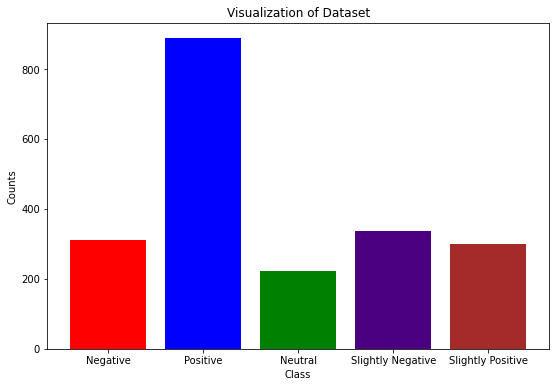

1    888
3    336
0    311
4    301
2    223
Name: Class, dtype: int64

In [4]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
x = x = ['Negative', 'Positive', 'Neutral', 'Slightly Negative', 'Slightly Positive']
#x,y = np.unique(data['Class'], return_counts=True)
y = [len(data[data['Class']== 0]), len(data[data['Class']== 1]), len(data[data['Class']== 2]),len(data[data['Class']== 3]),
     len(data[data['Class']== 4])]
plt.xlabel("Class")
plt.ylabel("Counts")
plt.title("Visualization of Dataset")
plt.bar(x, y, color=['red', 'blue', 'green','indigo', 'brown'])
plt.show()
data["Class"].value_counts()

# **Preprocessing**

In [ ]:
"""import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

def stemming(text):
  txt = " ".join([ps.stem(word) for word in text.split()])
  
  return txt

def remove_punc(text):
  txt = re.sub('[^a-zA-Z]',' ',text)
  txt = " ".join(txt.split())  

  return txt

def toLower(text):
  txt = text.lower()

  return txt

def remove_stopword(text):
  #add words that aren't in the NLTK stopwords list
  new_stopwords = ['ye', 'yeah', 'xiaomi', 'youtube']
  new_stopwords_list = stop_words.union(new_stopwords)

  #remove words that are in NLTK stopwords list
  not_stopwords = {"not", "isn't", "doesn't", "haven't", "won't", "ain't", "dont", "nothing"} 
  final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])
  
  txt = " ".join(w for w in text.split() if w not in final_stop_words) 

  return txt


def preprocessing(text):
  text = toLower(text)
  text = remove_punc(text)
  text = " ".join(text.split()) 
  text = remove_stopword(text)
  text = stemming(text)

  return text

data['Reviews'] = data['English Reviews'].apply(preprocessing)
data"""

'import nltk\nimport re\nnltk.download(\'stopwords\')\nfrom nltk.corpus import stopwords\nstop_words = set(stopwords.words(\'english\'))\nfrom nltk.stem import PorterStemmer\nfrom nltk.tokenize import word_tokenize\nps = PorterStemmer()\n\ndef stemming(text):\n  txt = " ".join([ps.stem(word) for word in text.split()])\n  \n  return txt\n\ndef remove_punc(text):\n  txt = re.sub(\'[^a-zA-Z]\',\' \',text)\n  txt = " ".join(txt.split())  \n\n  return txt\n\ndef toLower(text):\n  txt = text.lower()\n\n  return txt\n\ndef remove_stopword(text):\n  #add words that aren\'t in the NLTK stopwords list\n  new_stopwords = [\'ye\', \'yeah\', \'xiaomi\', \'youtube\']\n  new_stopwords_list = stop_words.union(new_stopwords)\n\n  #remove words that are in NLTK stopwords list\n  not_stopwords = {"not", "isn\'t", "doesn\'t", "haven\'t", "won\'t", "ain\'t", "dont", "nothing"} \n  final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])\n  \n  txt = " ".join(w for w in tex

In [5]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

def stemming(text):
  txt = " ".join([ps.stem(word) for word in text.split()])
  
  return txt

def remove_punc(text):
  txt = re.sub("[^a-zA-Z']",' ',text)
  txt = " ".join(txt.split())  

  return txt
def remove_punc_qut(text):
  txt = re.sub("[']",'',text)
  txt = " ".join(txt.split())  

  return txt

def toLower(text):
  txt = text.lower()

  return txt

def remove_stopword(text):
  #add words that aren't in the NLTK stopwords list
  new_stopwords = ['no', 'yeah', 'xiaomi', 'youtube']
  new_stopwords_list = stop_words.union(new_stopwords)

  #remove words that are in NLTK stopwords list
  not_stopwords = {"no", "not", "none", "no one", "nobody", "nothing", "neither", "nowhere", "never", "hardly", "scarcely"
                   "barely", "doesn't", "does not", "isn't", "is not", "was not", "wasn't", "shouldn't","should not", "wouldn't",
                   "would not", "couldn't","could not","can not" "Can't", "don't", "won't"} 
  final_stop_words = set([word for word in new_stopwords_list if word not in not_stopwords])
  
  txt = " ".join(w for w in text.split() if w not in final_stop_words) 

  return txt


def preprocessing(text):
  text = toLower(text)
  text = remove_punc(text)
  text = " ".join(text.split())
  text = remove_stopword(text)
  text= remove_punc_qut(text)
  text = " ".join(text.split()) 
  text = stemming(text)
  
  return text

data['Reviews'] = data['English Reviews'].apply(preprocessing)
data['Reviews']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0       though price much higher product qualiti satis...
1                  honest well satisfi thank daraz seller
2                              good bought pair use month
3                                            qualiti good
4                                           wrong product
                              ...                        
2054    product good not pictur saler provid littl fru...
2055    product great well built howev nut washer rust...
2056                                      got mah product
2057                              no good not bad product
2058                                       condit product
Name: Reviews, Length: 2059, dtype: object

In [6]:
#check frequency
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()
freq

product           1055
good               910
not                417
thank              390
qualiti            390
                  ... 
bump                 1
compromiseable       1
pli                  1
solut                1
speak                1
Length: 1678, dtype: int64

# **Feature Extraction**

In [7]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

tfidf_vect = tfidf.fit_transform(data['Reviews'])

dftf = pd.DataFrame(tfidf_vect.toarray(), columns=tfidf.get_feature_names())
dftf

#tfidf.get_feature_names()

,ab,abl,abnorm,absolut,accept,accid,accord,accordingli,account,accur,action,activ,actual,ad,adapt,add,address,adequ,adjust,advanc,advantag,advertis,advic,advis,afford,affort,africa,aftermarket,ago,aid,air,airflow,airpod,al,alamin,alert,alhamduillah,alhamduilllah,alhamdulillah,allah,...,wil,will,willingli,wind,window,wire,wiresto,wise,wish,wit,within,withn,without,wonder,wont,wood,woow,word,work,worri,wors,worst,worth,worthi,worthle,would,wouldnt,wow,woww,wrap,wreck,write,wrong,wronhg,xundd,ye,year,yesterday,yet,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.947099,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#BagofWOrds
from sklearn.feature_extraction.text import CountVectorizer
cVect = CountVectorizer()
count_vect = cVect.fit_transform(data['Reviews'])

dfcv = pd.DataFrame(count_vect.toarray(), columns=cVect.get_feature_names())
dfcv

#cVect.get_feature_names()

,ab,abl,abnorm,absolut,accept,accid,accord,accordingli,account,accur,action,activ,actual,ad,adapt,add,address,adequ,adjust,advanc,advantag,advertis,advic,advis,afford,affort,africa,aftermarket,ago,aid,air,airflow,airpod,al,alamin,alert,alhamduillah,alhamduilllah,alhamdulillah,allah,...,wil,will,willingli,wind,window,wire,wiresto,wise,wish,wit,within,withn,without,wonder,wont,wood,woow,word,work,worri,wors,worst,worth,worthi,worthle,would,wouldnt,wow,woww,wrap,wreck,write,wrong,wronhg,xundd,ye,year,yesterday,yet,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2056,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Visualize Data

In [ ]:
"""import seaborn as sns
sns.pairplot(dftf, hue = 'Class')"""

"import seaborn as sns\nsns.pairplot(dftf, hue = 'Class')"

# **Train test split**

In [8]:
label = data["Class"].values
label[:50]

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 3, 1, 2,
       1, 2, 1, 2, 2, 1])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf_vect, label, test_size = 0.2, random_state = 1, stratify = label)

Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
skfold=StratifiedKFold(n_splits=10)

In [10]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

kfold_validation=KFold(n_splits=10, shuffle=True)

# **MNB Algorithm**

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

mnb_model = MultinomialNB()
mnb_model = mnb_model.fit(x_train,y_train)
y_pred_mnb = mnb_model.predict(x_test)
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

           0       0.83      0.39      0.53        62
           1       0.52      0.97      0.68       178
           2       0.88      0.31      0.46        45
           3       0.41      0.13      0.20        67
           4       0.44      0.12      0.18        60

    accuracy                           0.55       412
   macro avg       0.61      0.38      0.41       412
weighted avg       0.58      0.55      0.48       412



Confusion Matrix

Confusion matrix, without normalization for Multinomial NB
[[ 24  31   0   3   4]
 [  1 172   2   3   0]
 [  2  28  14   0   1]
 [  1  53   0   9   4]
 [  1  45   0   7   7]]


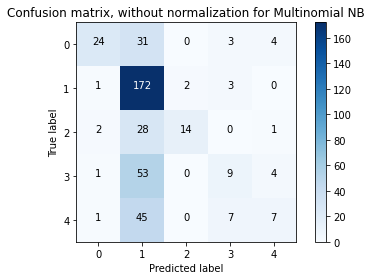

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Multinomial NB")
    else:
        print('Confusion matrix, without normalization for Multinomial NB')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_mnb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Multinomial NB')

plt.savefig('/content/drive/MyDrive/Thesis/Sentiment Analysis/MNB COnfusion.png')

ROC_AUC

Roc_AUC Score:  0.8219839517626719 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


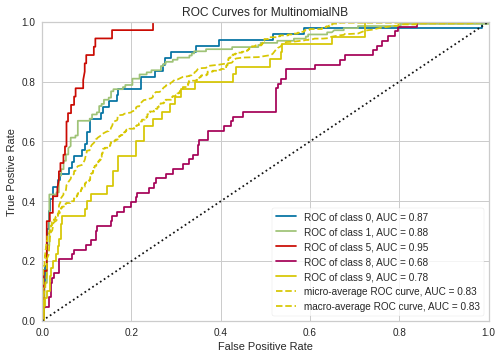

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt
y_pred_mnd_prob = mnb_model.predict_proba(x_test)
mnb = roc_auc_score(y_test, y_pred_mnd_prob, multi_class="ovo")
print("Roc_AUC Score: ", mnb, "\n")

# Instantiate the visualizer with the classification model
roc_auc(mnb_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '5', '8', '9'])

Using cross validation

In [17]:
results=cross_val_score(mnb_model,tfidf_vect,label,cv=kfold_validation, scoring = 'accuracy')
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.57 0.52 0.58 0.56 0.54 0.57 0.55 0.56 0.6  0.55] 

Accuracy: 0.56 (0.02)


# **Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

lgc_model = LogisticRegression(multi_class="multinomial")
#ovr = OneVsRestClassifier(lgc_model)
lgc_model = lgc_model.fit(x_train,y_train)
y_pred_lgc = lgc_model.predict(x_test)
print(classification_report(y_test,y_pred_lgc))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        62
           1       0.74      0.94      0.82       178
           2       0.73      0.49      0.59        45
           3       0.50      0.33      0.40        67
           4       0.49      0.38      0.43        60

    accuracy                           0.68       412
   macro avg       0.64      0.58      0.59       412
weighted avg       0.66      0.68      0.66       412



Confusion Matrix

Confusion matrix, without normalization for Logistic Regression
[[ 46   4   1   2   9]
 [  2 167   6   3   0]
 [  7  12  22   2   2]
 [  4  28   0  22  13]
 [  5  16   1  15  23]]


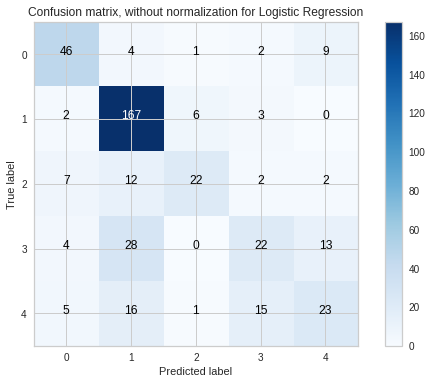

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Logistic Regression")
    else:
        print('Confusion matrix, without normalization for Logistic Regression')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_lgc)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Logistic Regression')

plt.savefig('/content/drive/MyDrive/Thesis/Sentiment Analysis/LGC COnfusion.png')

ROC_AUC

Roc_AUC Score:  0.865490484180523 



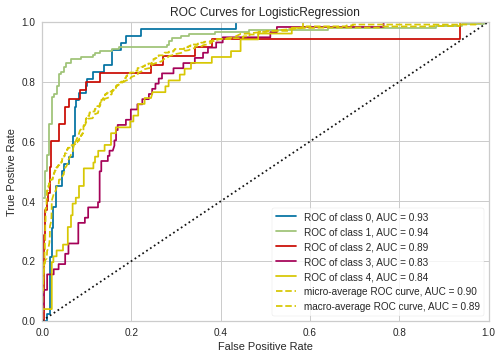

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

y_pred_lgc_prob = lgc_model.predict_proba(x_test)
lgc = roc_auc_score(y_test, y_pred_lgc_prob, multi_class="ovo")
print("Roc_AUC Score: ", lgc, "\n")

# Instantiate the visualizer with the classification model
roc_auc(lgc_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

Cross Validation

In [21]:
results=cross_val_score(lgc_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.69 0.64 0.67 0.73 0.63 0.66 0.71 0.66 0.74 0.66] 

Accuracy: 0.68 (0.04)


# **SVM**

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svmModel = SVC(kernel = 'rbf', probability=True)
svmModel.fit(x_train,y_train)
y_predSVM = svmModel.predict(x_test)
#print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        62
           1       0.70      0.93      0.80       178
           2       0.74      0.44      0.56        45
           3       0.48      0.31      0.38        67
           4       0.47      0.33      0.39        60

    accuracy                           0.66       412
   macro avg       0.63      0.55      0.57       412
weighted avg       0.64      0.66      0.64       412



Confusion Matrix

Confusion matrix, without normalization for SVM
[[ 46   5   1   1   9]
 [  1 166   5   5   1]
 [  4  19  20   1   1]
 [  6  28   0  21  12]
 [  5  18   1  16  20]]


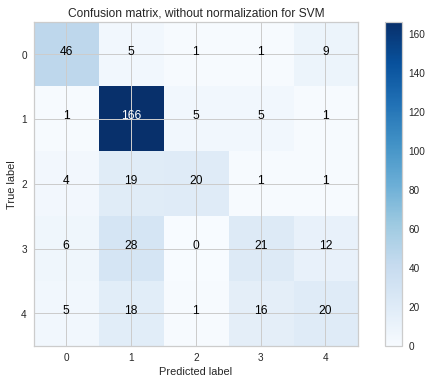

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for SVM")
    else:
        print('Confusion matrix, without normalization for SVM')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_predSVM)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for SVM')

ROC_AUC

Roc_AUC Score:  0.8812805893712141 



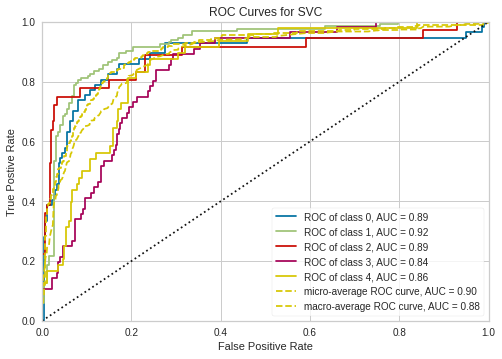

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc

import matplotlib.pyplot as plt
y_pred_svm_prob = svmModel.predict_proba(x_test)
svm = roc_auc_score(y_test, y_pred_svm_prob, multi_class="ovo")
print("Roc_AUC Score: ", svm, "\n")

# Instantiate the visualizer with the classification model
roc_auc(svmModel, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

Cross Validation

In [26]:
results=cross_val_score(svmModel,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.68 0.72 0.69 0.65 0.59 0.61 0.66 0.65 0.68 0.69] 

Accuracy: 0.66 (0.04)


# **Passive Algorithm**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
linear_clf = PassiveAggressiveClassifier(random_state=42)

linear_clf.fit(x_train, y_train)
pred = linear_clf.predict(x_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.61      0.66      0.64        62
           1       0.80      0.87      0.83       178
           5       0.49      0.51      0.50        45
           8       0.36      0.33      0.34        60
           9       0.40      0.30      0.34        67

    accuracy                           0.63       412
   macro avg       0.53      0.53      0.53       412
weighted avg       0.61      0.63      0.62       412



Cross Validation

In [ ]:
results=cross_val_score(linear_clf,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.62621359 0.65533981 0.66019417 0.59708738 0.60194175 0.63106796
 0.73300971 0.63592233 0.67475728 0.6195122 ] 

Accuracy: 0.64 (0.04)


# **Random Forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)
rf_model = rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        62
           1       0.73      0.89      0.80       178
           2       0.65      0.73      0.69        45
           3       0.50      0.33      0.40        67
           4       0.52      0.25      0.34        60

    accuracy                           0.66       412
   macro avg       0.60      0.59      0.58       412
weighted avg       0.64      0.66      0.64       412



Confusion Matrix

Confusion matrix, without normalization for Random Forest
[[ 45   5   7   0   5]
 [  4 158   9   6   1]
 [  3   8  33   1   0]
 [  8  29   0  22   8]
 [ 12  16   2  15  15]]


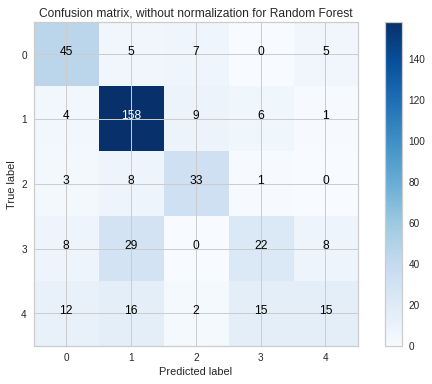

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Random Forest")
    else:
        print('Confusion matrix, without normalization for Random Forest')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Random Forest')

ROC_AUC

Roc_AUC Score:  0.8653296993396754 



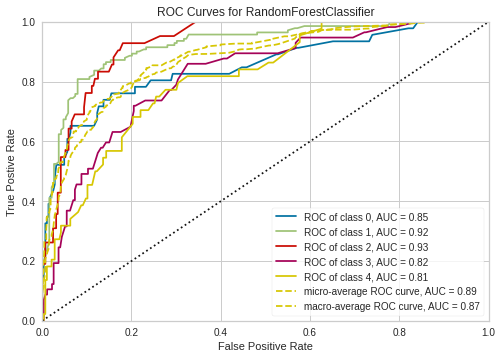

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt
y_pred_rf_prob = rf_model.predict_proba(x_test)
rf = roc_auc_score(y_test, y_pred_rf_prob, multi_class="ovo")
print("Roc_AUC Score: ", rf, "\n")

# Instantiate the visualizer with the classification model
roc_auc(rf_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

Cross Validaion

In [31]:
results=cross_val_score(rf_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.74 0.64 0.69 0.68 0.69 0.74 0.61 0.66 0.66 0.69] 

Accuracy: 0.68 (0.04)


# **KNN**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.62      0.34      0.44        62
           1       0.76      0.49      0.59       178
           2       0.17      0.69      0.27        45
           3       0.35      0.25      0.30        67
           4       0.45      0.23      0.31        60

    accuracy                           0.41       412
   macro avg       0.47      0.40      0.38       412
weighted avg       0.56      0.41      0.44       412



Confusion Matrix

Confusion matrix, without normalization for KNN
[[21  4 27  5  5]
 [ 3 87 72 12  4]
 [ 2  7 31  4  1]
 [ 3  9 31 17  7]
 [ 5  8 23 10 14]]


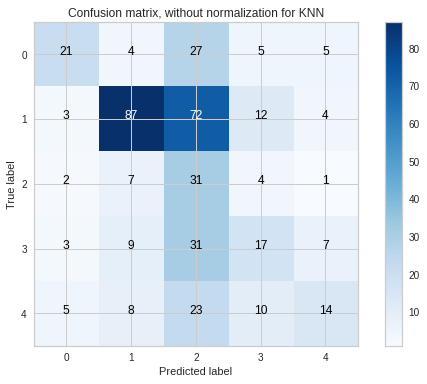

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for KNN")
    else:
        print('Confusion matrix, without normalization for KNN')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_knn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for KNN')

ROC_AUC

Roc_AUC Score:  0.6254284109836223 



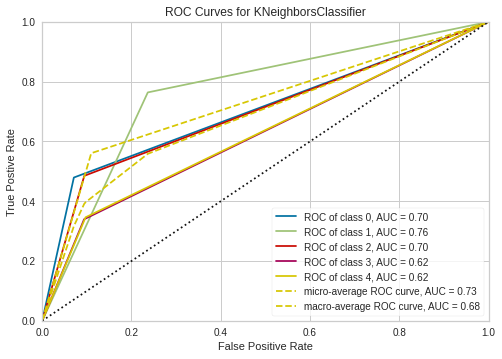

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

y_pred_knn_prob = knn_model.predict_proba(x_test)
knn = roc_auc_score(y_test, y_pred_knn_prob, multi_class="ovo")
print("Roc_AUC Score: ", knn, "\n")

# Instantiate the visualizer with the classification model
roc_auc(knn_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

In [36]:
results=cross_val_score(knn_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.46 0.4  0.45 0.45 0.41 0.49 0.49 0.45 0.42 0.43] 

Accuracy: 0.44 (0.03)


# **Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier
dst_model = DecisionTreeClassifier(random_state=1)
dst_model.fit(x_train, y_train)
y_pred_dst = dst_model.predict(x_test)
print(classification_report(y_test,y_pred_dst))

              precision    recall  f1-score   support

           0       0.59      0.66      0.62        62
           1       0.73      0.73      0.73       178
           2       0.60      0.62      0.61        45
           3       0.43      0.39      0.41        67
           4       0.33      0.30      0.31        60

    accuracy                           0.59       412
   macro avg       0.53      0.54      0.54       412
weighted avg       0.58      0.59      0.59       412



Confusion Matrix

Confusion matrix, without normalization for Decision Tree
[[ 41   4   4   1  12]
 [  8 130  14  17   9]
 [  8   5  28   2   2]
 [  4  22   1  26  14]
 [  9  18   0  15  18]]


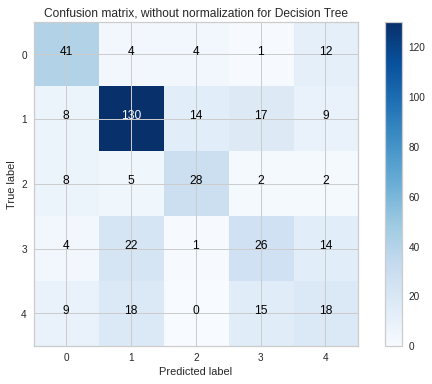

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Decision Tree")
    else:
        print('Confusion matrix, without normalization for Decision Tree')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_dst)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Decision Tree')

ROC_AUC

Roc_AUC Score:  0.7123016667548249 



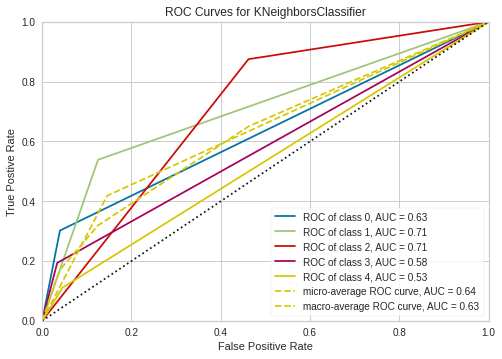

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

y_pred_dst_prob = dst_model.predict_proba(x_test)
dst = roc_auc_score(y_test, y_pred_dst_prob, multi_class="ovo")
print("Roc_AUC Score: ", dst, "\n")

# Instantiate the visualizer with the classification model
roc_auc(knn_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

In [42]:
results=cross_val_score(dst_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.63 0.59 0.63 0.55 0.64 0.58 0.65 0.62 0.54 0.62] 

Accuracy: 0.60 (0.04)


Xgboost

# **Predictive Model**

In [45]:
def preprocessing(text):
  text = toLower(text)
  text = remove_punc(text)
  text = remove_stopword(text)
  text = remove_punc_qut(text)
  print(text)
  text = stemming(text)
  text = tfidf.transform([text])

  return text

text = "Product isn't original."

txt = preprocessing(text)
predict = rf_model.predict(txt)
if predict[0] == 1:
  print("Positive")
elif predict[0] == 0:
  print("Negative")
elif predict[0] == 8:
  print("Slightly Positive")
elif predict[0] == 9:
  print("Slightly Negative")
elif predict[0] == 5:
  print("Neutral")

product isnt original
Positive
